<a href="https://www.kaggle.com/code/iqmansingh/object-classification-dogs-vs-cats?scriptVersionId=134396358" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [79]:
import numpy as np
import pandas as pd 
import tensorflow as tf
import datetime
import warnings
warnings.filterwarnings("ignore")
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('dark_background')

In [42]:
classes = ['cats','dogs']

In [43]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255.0, 
                               shear_range=0.15, 
                               zoom_range=0.2, 
                               horizontal_flip=True
                              ) 

train_data = generator.flow_from_directory( directory='../input/cat-and-dog/training_set/training_set', 
                                            target_size=(128, 128),
                                            color_mode='grayscale',
                                            classes=classes, 
                                            batch_size=64, 
                                            )


test_data = generator.flow_from_directory( directory='../input/cat-and-dog/test_set/test_set', 
                                           target_size=(128, 128), 
                                           color_mode='grayscale',
                                           classes=classes, 
                                           batch_size=64,
                                           shuffle=False
                                           )

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


# CNN

In [44]:
model = tf.keras.models.Sequential()

In [45]:
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',padding='same',input_shape=[128,128,1]))

In [46]:
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',padding='same'))

In [47]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'))

In [48]:
model.add(tf.keras.layers.BatchNormalization())

In [49]:
model.add(tf.keras.layers.Conv2D(filters = 64,kernel_size = 3,padding = 'same',activation = 'relu'))

In [50]:
model.add(tf.keras.layers.Conv2D(filters = 64,kernel_size = 3,padding = 'same',activation = 'relu'))

In [51]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'))

In [52]:
model.add(tf.keras.layers.BatchNormalization())

In [53]:
model.add(tf.keras.layers.Flatten())

In [54]:
model.add(tf.keras.layers.Dense(units=128,activation='relu'))

In [55]:
model.add(tf.keras.layers.Dropout(0.3))

In [56]:
model.add(tf.keras.layers.Dense(units=128,activation='relu'))

In [57]:
model.add(tf.keras.layers.Dense(units=2,activation='softmax'))

In [58]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 128, 128, 32)      320       
                                                                 
 conv2d_9 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_4 (Batc  (None, 64, 64, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_10 (Conv2D)          (None, 64, 64, 64)        18496     
                                                                 
 conv2d_11 (Conv2D)          (None, 64, 64, 64)       

In [59]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['categorical_crossentropy','accuracy'])

In [88]:
earlyStopping =  tf.keras.callbacks.EarlyStopping(patience=15, monitor='val_accuracy')

history = model.fit(train_data, epochs=50, validation_data=test_data, shuffle=True, callbacks=[earlyStopping],batch_size=64)
# history = model.fit(train_data, epochs=10, validation_split=0.2, shuffle=True, callbacks=[earlyStopping],batch_size=32)


Epoch 1/50
126/126 [==============================] - 39s 307ms/step - loss: 0.5438 - categorical_crossentropy: 0.5438 - accuracy: 0.7257 - val_loss: 0.5900 - val_categorical_crossentropy: 0.5900 - val_accuracy: 0.7069
Epoch 2/50
126/126 [==============================] - 38s 300ms/step - loss: 0.5329 - categorical_crossentropy: 0.5329 - accuracy: 0.7355 - val_loss: 0.6072 - val_categorical_crossentropy: 0.6072 - val_accuracy: 0.7331
Epoch 3/50
126/126 [==============================] - 37s 294ms/step - loss: 0.5097 - categorical_crossentropy: 0.5097 - accuracy: 0.7509 - val_loss: 0.5996 - val_categorical_crossentropy: 0.5996 - val_accuracy: 0.6530
Epoch 4/50
126/126 [==============================] - 37s 295ms/step - loss: 0.4881 - categorical_crossentropy: 0.4881 - accuracy: 0.7693 - val_loss: 0.8319 - val_categorical_crossentropy: 0.8319 - val_accuracy: 0.5437
Epoch 5/50
126/126 [==============================] - 36s 290ms/step - loss: 0.4766 - categorical_crossentropy: 0.4766 - acc

In [89]:
df = pd.DataFrame(history.history)
df_loss = df[['loss', 'val_loss']]
df_acc =  df[['accuracy', 'val_accuracy']]

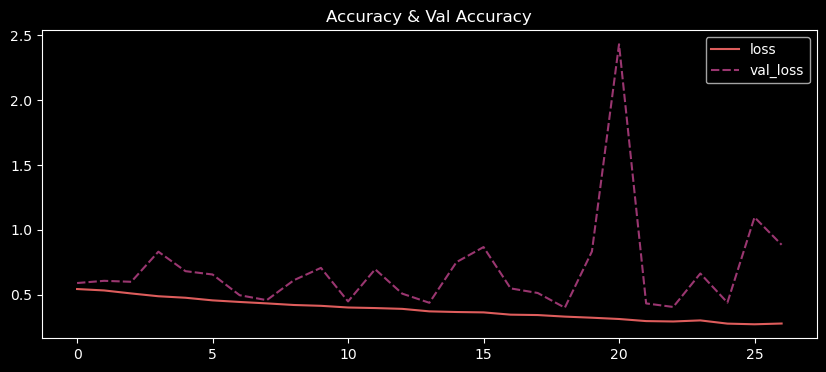

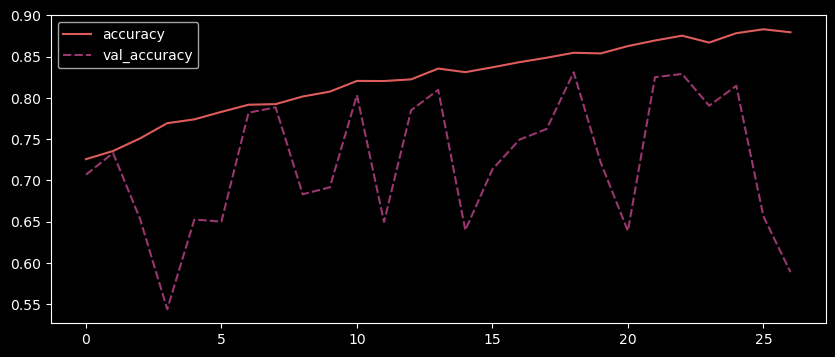

In [90]:
plt.figure(figsize=(10,4))
plt.title("Loss & Val Loss")
sns.lineplot(df_loss,palette="flare");

plt.title("Accuracy & Val Accuracy")
plt.figure(figsize=(10,4))
sns.lineplot(df_acc,palette="flare");

In [91]:
print(model.evaluate(train_data))
print(model.evaluate(test_data))

126/126 [==============================] - 28s 218ms/step - loss: 0.7956 - categorical_crossentropy: 0.7956 - accuracy: 0.6035
[0.7955560088157654, 0.7955560088157654, 0.6034978032112122]
32/32 [==============================] - 7s 220ms/step - loss: 0.8772 - categorical_crossentropy: 0.8772 - accuracy: 0.5947
[0.877153217792511, 0.877153217792511, 0.5946614146232605]
